## Detector MAP para Variable Aleatoria con Ruido Gaussiano

## Planteamiento del Problema

Consideramos una variable aleatoria $X \in \{-1, +3\}$ con probabilidades a priori:
- $P_X(-1) = 0.4$
- $P_X(+3) = 0.6$

La observación disponible es $Y = X + N$, donde $N$ es una variable aleatoria gaussiana de media $\mu = 0$ y varianza $\sigma^2 = 0.4$, independiente de $X$.

## 1. Detector MAP (Maximum A Posteriori)

El criterio MAP consiste en elegir la hipótesis más probable dada la observación. Para cada valor observado $y$, decidimos $\hat{X} = x_i$ si:

$$P(X = x_i | Y = y) > P(X = x_j | Y = y) \quad \forall j \neq i$$

Aplicando el teorema de Bayes:

$$P(X = x_i | Y = y) = \frac{p(Y = y | X = x_i) \cdot P(X = x_i)}{p(Y = y)}$$

Dado que $p(Y = y)$ es constante para un valor observado $y$, el criterio se reduce a maximizar:

$$P(X = x_i | Y = y) \propto p(Y = y | X = x_i) \cdot P(X = x_i)$$

En nuestro caso binario, decidimos $\hat{X} = +3$ si:

$$p(Y = y | X = +3) \cdot P(X = +3) > p(Y = y | X = -1) \cdot P(X = -1)$$

Y decidimos $\hat{X} = -1$ en caso contrario.

### Cálculo del Nivel de Decisión $\gamma$

El nivel de decisión $\gamma$ es el valor de $y$ donde ambas hipótesis son igualmente probables:

$$p(Y = \gamma | X = -1) \cdot P(X = -1) = p(Y = \gamma | X = +3) \cdot P(X = +3)$$

Sabemos que $Y | X = x_i \sim \mathcal{N}(x_i, \sigma^2)$, por lo que:

$$p(Y = y | X = x_i) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(y - x_i)^2}{2\sigma^2}\right)$$

Sustituyendo los valores:

$$\frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(\gamma - (-1))^2}{2\sigma^2}\right) \cdot 0.4 = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(\gamma - 3)^2}{2\sigma^2}\right) \cdot 0.6$$

Simplificando y tomando logaritmo natural:

$$\ln(0.4) - \frac{(\gamma + 1)^2}{2\sigma^2} = \ln(0.6) - \frac{(\gamma - 3)^2}{2\sigma^2}$$

Desarrollando los cuadrados:

$$\ln(0.4) - \frac{\gamma^2 + 2\gamma + 1}{2\sigma^2} = \ln(0.6) - \frac{\gamma^2 - 6\gamma + 9}{2\sigma^2}$$

Cancelando términos y resolviendo para $\gamma$:

$$\ln\left(\frac{0.4}{0.6}\right) = \frac{1}{2\sigma^2} \left[(\gamma + 1)^2 - (\gamma - 3)^2\right]$$

$$\ln\left(\frac{0.4}{0.6}\right) = \frac{1}{2\sigma^2} \left[\gamma^2 + 2\gamma + 1 - \gamma^2 + 6\gamma - 9\right]$$

$$\ln\left(\frac{0.4}{0.6}\right) = \frac{1}{2\sigma^2} \left[8\gamma - 8\right]$$

$$\ln\left(\frac{0.4}{0.6}\right) = \frac{4\gamma - 4}{\sigma^2}$$

Finalmente:

$$\gamma = 1 + \frac{\sigma^2}{4} \ln\left(\frac{0.4}{0.6}\right)$$

Con $\sigma^2 = 0.4$:

$$\gamma = 1 + 0.1 \ln\left(\frac{0.4}{0.6}\right) = 1 + 0.1 \ln\left(\frac{2}{3}\right)$$

## 2. Probabilidad de Error

La probabilidad de error $P_e$ se calcula como:

$$P_e = P(\hat{X} \neq X)$$

Que puede expresarse como:

$$P_e = P(X = -1) \cdot P(\hat{X} = +3 | X = -1) + P(X = +3) \cdot P(\hat{X} = -1 | X = +3)$$

Sustituyendo:

$$P_e = 0.4 \cdot P(Y > \gamma | X = -1) + 0.6 \cdot P(Y < \gamma | X = +3)$$

Dado que $Y | X = -1 \sim \mathcal{N}(-1, \sigma^2)$:

$$P(Y > \gamma | X = -1) = P\left(\frac{Y - (-1)}{\sigma} > \frac{\gamma - (-1)}{\sigma}\right) = Q\left(\frac{\gamma + 1}{\sigma}\right)$$

Donde $Q(x) = 1 - \Phi(x)$ y $\Phi(x)$ es la función de distribución acumulada de la normal estándar.

De manera similar, dado que $Y | X = +3 \sim \mathcal{N}(3, \sigma^2)$:

$$P(Y < \gamma | X = +3) = \Phi\left(\frac{\gamma - 3}{\sigma}\right)$$

Por lo tanto:

$$P_e = 0.4 \cdot Q\left(\frac{\gamma + 1}{\sigma}\right) + 0.6 \cdot \Phi\left(\frac{\gamma - 3}{\sigma}\right)$$

Esto se puede calcular sustituyendo el valor de $\gamma$ obtenido anteriormente y utilizando las tablas o funciones de la distribución normal estándar.

Nivel de decisión γ = 0.9595
Probabilidad de error Pe = 0.000766


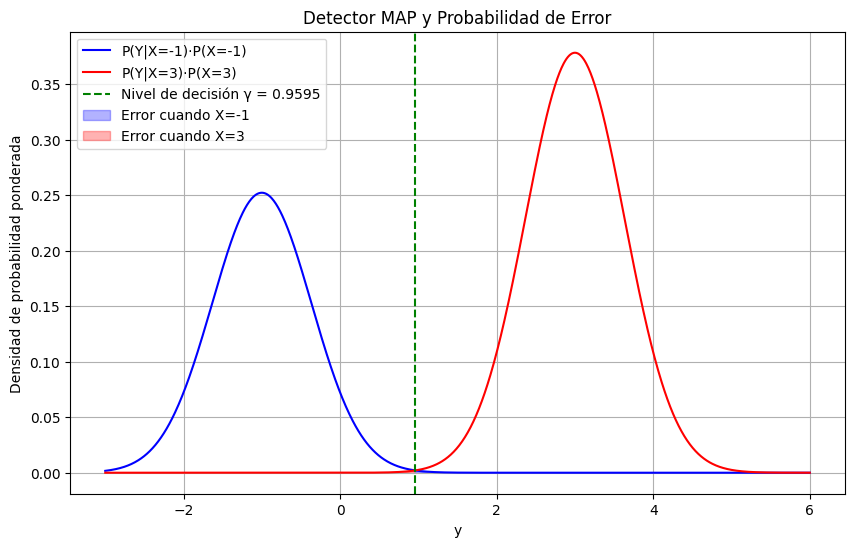

Probabilidad de error (verificación numérica) = 0.000766

Resumen de la solución:
1. Nivel de decisión para detector MAP: γ = 0.9595
2. Probabilidad de error: Pe = 0.000766
   Verificación numérica: Pe = 0.000766


In [1]:
# Detector MAP para una variable aleatoria con ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

# Definimos los parámetros del problema
x_valores = np.array([-1, 3])            # Valores posibles de X
px = np.array([0.4, 0.6])                # Probabilidades a priori
sigma2 = 0.4                             # Varianza del ruido gaussiano
sigma = np.sqrt(sigma2)                  # Desviación estándar del ruido

## 1. Encontrar el nivel de decisión para el detector MAP

# El detector MAP decide X = x_i si la probabilidad a posteriori P(X = x_i|Y = y) es máxima
# Usando el teorema de Bayes: P(X = x_i|Y = y) ∝ P(Y = y|X = x_i) * P(X = x_i)

# La función de densidad condicional P(Y = y|X = x_i) es gaussiana con media x_i y varianza sigma^2
# El nivel de decisión γ es el punto donde P(X = -1|Y = y) = P(X = 3|Y = y)

# Definimos las funciones de densidad condicionales
def p_y_dado_x(y, x_i):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-((y - x_i)**2)/(2*sigma2))

# El nivel de decisión γ satisface:
# p(y|x=-1) * P(x=-1) = p(y|x=3) * P(x=3)
# Sustituyendo las expresiones:
# (1/(sigma*sqrt(2π))) * exp(-((y-(-1))^2)/(2*sigma^2)) * 0.4 = (1/(sigma*sqrt(2π))) * exp(-((y-3)^2)/(2*sigma^2)) * 0.6

# Resolviendo para y:
# y = 1 + (sigma^2/4)*(ln(0.4) - ln(0.6))

# Calculamos el nivel de decisión
gamma = 1 + (sigma2/4)*(np.log(0.4) - np.log(0.6))
print(f"Nivel de decisión γ = {gamma:.4f}")

## 2. Calcular analíticamente la probabilidad de error

# La probabilidad de error es:
# Pe = P(X = -1) * P(decidir X = 3|X = -1) + P(X = 3) * P(decidir X = -1|X = 3)
# Pe = 0.4 * P(Y > γ|X = -1) + 0.6 * P(Y < γ|X = 3)

# Calculamos P(Y > γ|X = -1) = P(N > γ - (-1)) = P(N > γ + 1)
# Dado que N ~ N(0, sigma^2), tenemos que P(N > γ+1) = 1 - Φ((γ+1)/sigma)
# donde Φ es la función de distribución acumulada de la normal estándar

p_error_dado_x_neg1 = 1 - norm.cdf((gamma + 1)/sigma)

# Calculamos P(Y < γ|X = 3) = P(N < γ - 3) = Φ((γ-3)/sigma)
p_error_dado_x_3 = norm.cdf((gamma - 3)/sigma)

# Probabilidad de error total
p_error = 0.4 * p_error_dado_x_neg1 + 0.6 * p_error_dado_x_3
print(f"Probabilidad de error Pe = {p_error:.6f}")

## 3. Visualización de las distribuciones y el nivel de decisión

# Rango de valores para graficar
y_range = np.linspace(-3, 6, 1000)

# Calculamos las funciones de densidad posteriores
p_y_dado_xneg1 = np.array([p_y_dado_x(y, -1) for y in y_range])
p_y_dado_x3 = np.array([p_y_dado_x(y, 3) for y in y_range])

# Multiplicamos por las probabilidades a priori
p_posterior_xneg1 = p_y_dado_xneg1 * px[0]
p_posterior_x3 = p_y_dado_x3 * px[1]

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(y_range, p_posterior_xneg1, 'b-', label='P(Y|X=-1)·P(X=-1)')
plt.plot(y_range, p_posterior_x3, 'r-', label='P(Y|X=3)·P(X=3)')
plt.axvline(x=gamma, color='g', linestyle='--', label=f'Nivel de decisión γ = {gamma:.4f}')

# Sombreamos las áreas de error
idx_gamma = np.argmin(np.abs(y_range - gamma))
plt.fill_between(y_range[idx_gamma:], p_posterior_xneg1[idx_gamma:], alpha=0.3, color='blue', label='Error cuando X=-1')
plt.fill_between(y_range[:idx_gamma], p_posterior_x3[:idx_gamma], alpha=0.3, color='red', label='Error cuando X=3')

plt.title('Detector MAP y Probabilidad de Error')
plt.xlabel('y')
plt.ylabel('Densidad de probabilidad ponderada')
plt.legend()
plt.grid(True)
plt.show()

# Verificación numérica de la probabilidad de error
def integrar_error_x_neg1():
    # P(decidir X=3|X=-1) = P(Y > γ|X=-1)
    def integrando(y):
        return p_y_dado_x(y, -1)
    
    resultado, _ = integrate.quad(integrando, gamma, np.inf)
    return resultado

def integrar_error_x_3():
    # P(decidir X=-1|X=3) = P(Y < γ|X=3)
    def integrando(y):
        return p_y_dado_x(y, 3)
    
    resultado, _ = integrate.quad(integrando, -np.inf, gamma)
    return resultado

# Calculamos la probabilidad de error mediante integración numérica
p_error_numerico = 0.4 * integrar_error_x_neg1() + 0.6 * integrar_error_x_3()
print(f"Probabilidad de error (verificación numérica) = {p_error_numerico:.6f}")

## 4. Resumen de resultados

print("\nResumen de la solución:")
print(f"1. Nivel de decisión para detector MAP: γ = {gamma:.4f}")
print(f"2. Probabilidad de error: Pe = {p_error:.6f}")
print(f"   Verificación numérica: Pe = {p_error_numerico:.6f}")